<a href="https://colab.research.google.com/github/Rohith616/Client-Project-1/blob/main/AutoTS_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evalml auto-ts autots['additional'] dask[complete]


     |████████████████████████████████| 6.4 MB 4.1 MB/s 
     |████████████████████████████████| 109 kB 39.2 MB/s 
     |████████████████████████████████| 460 kB 52.9 MB/s 
     |████████████████████████████████| 275 kB 50.8 MB/s 
     |████████████████████████████████| 82 kB 400 kB/s 
     |████████████████████████████████| 6.5 MB 30.7 MB/s 
     |████████████████████████████████| 1.1 MB 40.2 MB/s 
     |████████████████████████████████| 3.0 MB 31.2 MB/s 
     |████████████████████████████████| 564 kB 44.1 MB/s 
     |████████████████████████████████| 356 kB 37.3 MB/s 
     |████████████████████████████████| 1.4 MB 42.2 MB/s 
     |████████████████████████████████| 9.8 MB 29.7 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 2.0 MB 34.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 76.1 MB 73 kB/s 
     |████████████████████████████████| 173.6 MB 8.5 kB/s 
     |█████████████

In [ ]:
from auto_ts import auto_timeseries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
def train_model(data: pd.DataFrame) -> [auto_timeseries]:
  data["ds"] = pd.to_datetime(data["ds"])
  data['event'].fillna("no event", inplace = True)
  data['holiday'].fillna("休日なし", inplace = True) #replace it with no holiday

  df =data.select_dtypes(include='object')
  
  df=df.drop(['target_address'],axis=1)
  for cols in df:
    dummies =pd.get_dummies(df[cols],drop_first=True)
    df = pd.concat([df,dummies],axis='columns')
  data=pd.concat([data,df],axis='columns')
  data=data.drop(['target_address','Unnamed: 0','event','cat_r','holiday','weather'],axis=1)
  data = data.set_index('ds')
  # Initialise the Scaler
  scaler = StandardScaler()
  # To scale data
  scaler.fit(data)
  train, test=train_test_split(data,test_size=0.25)
  model = auto_timeseries(forecast_period=219, score_type='rmse',seasonal_period=12, time_interval='D', model_type='best')
  model.fit(traindata= train, ts_column="ds", target="y")
  return model

In [ ]:
if __name__=="__main__":
  data = pd.read_csv('/content/preprocessed_data.csv')
  model = train_model(data)

In [ ]:
data = pd.read_csv('/content/preprocessed_data.csv')
data.head()

,Unnamed: 0,ds,target_id,target_address,y,event,cat_r,reg_wind,reg_r,holiday,weather,temp_max,temp_min
0,0,2015-01-01,0,東京都/東京,89.058108,NaN,cat_r_1,4.4,17.856631,元日,cloud,8.2,0.7
1,1,2015-01-02,0,東京都/東京,88.638431,NaN,cat_r_0,2.1,-2.435871,NaN,sunny,7.9,-2.2
2,2,2015-01-03,0,東京都/東京,80.884749,NaN,cat_r_1,3.0,15.382444,NaN,sunny,8.9,-1.1
3,3,2015-01-04,0,東京都/東京,89.288376,NaN,cat_r_0,1.3,11.864588,NaN,cloud,9.3,-0.4
4,4,2015-01-05,0,東京都/東京,86.867064,NaN,cat_r_1,2.4,-14.973754,NaN,sunny,12.9,1.3


In [ ]:
data["event"].fillna("no event", inplace=True)
data["holiday"].fillna("休日なし", inplace=True)  # replace it with no holiday
data["ds"] = pd.to_datetime(data["ds"])

In [ ]:
df = data.select_dtypes(include="object")
df = df.drop(["target_address"], axis=1)
for cols in df:

  dummies = pd.get_dummies(df[cols], drop_first=True)
  df = pd.concat([df, dummies], axis="columns")
data = pd.concat([data, df], axis="columns")
df = data.select_dtypes(include=["object"])
data = data.drop(df.columns, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
mp_train_data, validation_data = train_test_split(
          data, test_size=0.2)

In [ ]:
feed_dict = parameters = {
            "forecast_period": 219,
            "score_type": "rmse",
            "time_interval": "Month",
            "non_seasonal_pdq": None,
            "seasonality": False,
            "seasonal_period": 12,
            "time_interval": "D",
            "model_type": "best",
            "verbose": 1,
        }

In [ ]:
model = auto_timeseries(**feed_dict)

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (2804, 33)
Alert: Could not detect strf_time_format of ds. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 66
It is a Monthly time series.


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller paramet

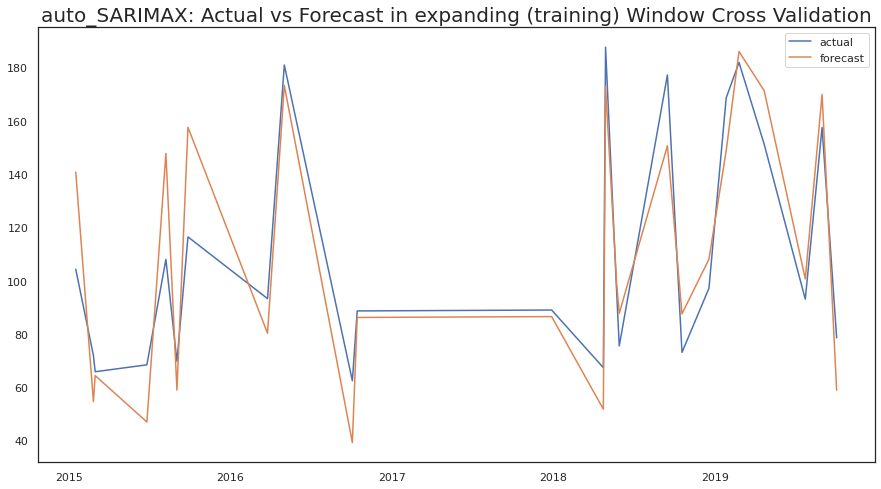

In [ ]:
model.fit(traindata=mp_train_data, ts_column="ds", target="y")

In [ ]:
validation_data = validation_data.drop('y',axis=1)

In [ ]:
pred = model.predict(testdata=validation_data)

Predicting using test dataframe as input for auto_SARIMAX model


In [ ]:
future_data = data.drop("y", axis=1)
future_data = future_data.iloc[:1000]

In [ ]:
future_pred = model.predict(testdata=future_data, model="best")

Predicting using test dataframe as input for auto_SARIMAX model
Model is erroring during prediction. Check inputs and try again.


In [ ]:
pred

y,yhat,mean_se,mean_ci_lower,mean_ci_upper
2804,169.869937,24.576311,121.701252,218.038622
2805,175.845105,26.074591,124.739846,226.950365
2806,65.590306,28.418125,9.891805,121.288807
2807,172.868796,31.934988,110.277370,235.460222
2808,78.772904,33.994636,12.144642,145.401166
...,...,...,...,...
3501,83.998535,332.357819,-567.410821,735.407891
3502,134.666812,332.595015,-517.207440,786.541063
3503,90.235562,332.832042,-562.103254,742.574378
3504,143.152777,333.068901,-509.650273,795.955826


In [ ]:
future_pred

In [ ]:
future_pred = future_pred[[ "yhat"]]
future_pred = future_pred.rename(columns={"yhat": "y"})

In [ ]:
pred = pred['yhat'].reset_index()
pred.drop('index',axis=1,inplace=True)

In [ ]:
pred

,yhat
0,169.869937
1,175.845105
2,65.590306
3,172.868796
4,78.772904
...,...
697,83.998535
698,134.666812
699,90.235562
700,143.152777


In [ ]:
future_pred

y,y
2804,61.732895
2805,82.423937
2806,74.840830
2807,76.238263
2808,79.624913
...,...
3799,56.233979
3800,60.173348
3801,59.580558
3802,68.063585


Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (1402, 33)
Alert: Could not detect strf_time_format of ds. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Alert! Data is not stationary even after two differencing. Continuing...
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for 

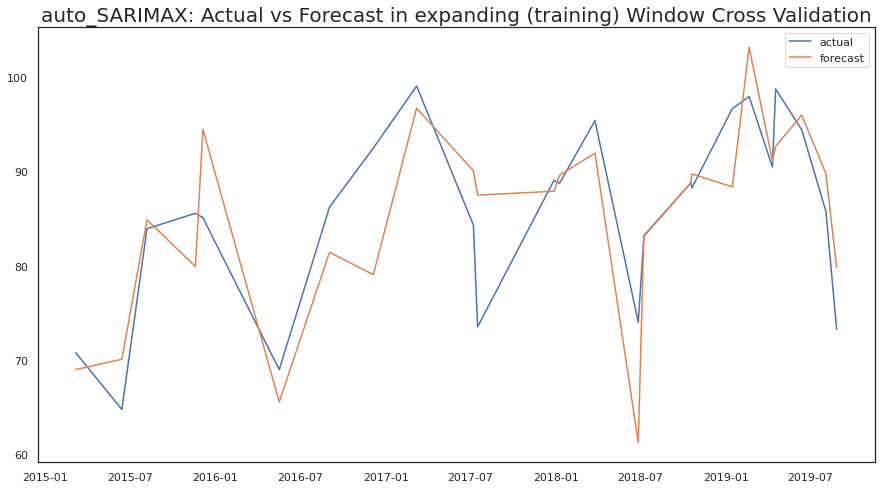

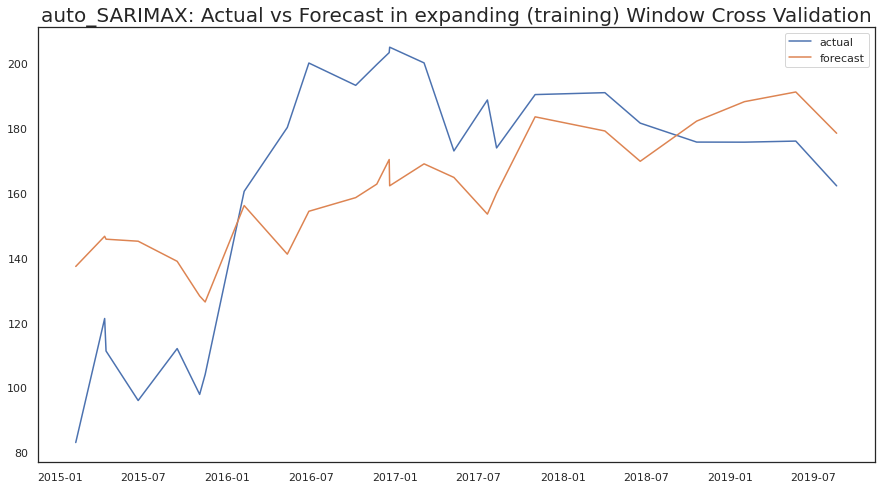

In [ ]:
pred = pd.DataFrame()
for target_id, sub_data in data.groupby("target_id"):
        train, test=train_test_split(sub_data,test_size=0.20)
        sub_future_data = future_data[future_data["target_id"] == target_id]
        model.fit(traindata=train, ts_column="ds", target="y")
        pred1 = model.predict(testdata=sub_future_data)
        pred = pd.concat([pred,pred1],ignore_index=True)


In [ ]:
pred

,yhat
0,74.098051
1,89.931696
2,87.026740
3,84.601562
4,90.853345
...,...
995,79.925033
996,84.134133
997,83.351944
998,91.191266


In [ ]:
pred = pred['yhat'].reset_index()
pred.drop('index',axis=1,inplace=True)